In [90]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [91]:
data=pd.read_csv('D:/Data Science/Machine Learning/bank3.csv',sep=',')

In [92]:
data=data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
1,19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
2,19,student,single,unknown,no,0,no,no,cellular,11,feb,123,3,-1,0,unknown,no
3,19,student,single,unknown,no,1169,no,no,cellular,6,feb,463,18,-1,0,unknown,no
4,20,student,single,secondary,no,1191,no,no,cellular,12,feb,274,1,-1,0,unknown,no


In [94]:
data['education'].unique()

array(['primary', 'secondary', 'unknown', 'tertiary'], dtype=object)

In [95]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

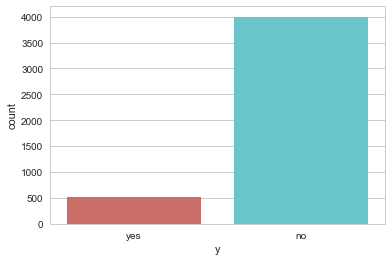

In [96]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [97]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [98]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [99]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


In [100]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021


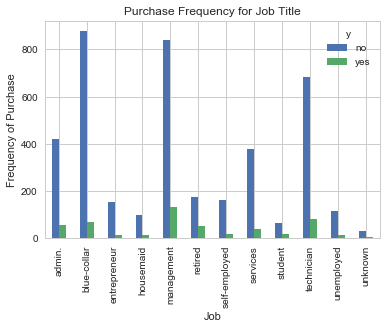

In [101]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

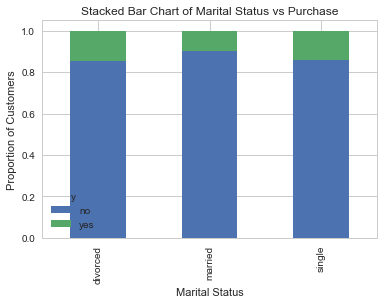

In [102]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.



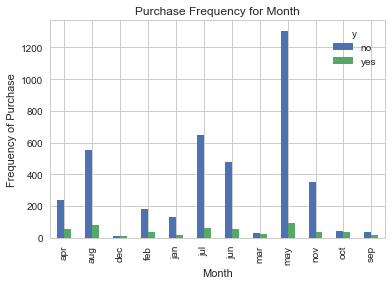

In [103]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.



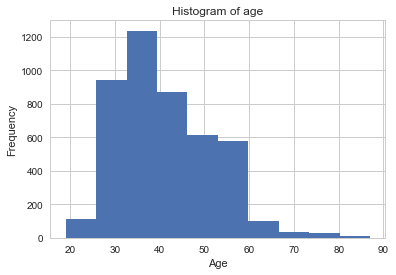

In [104]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.



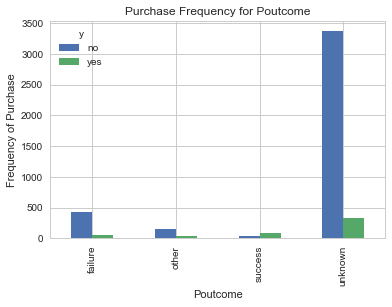

In [105]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.



# Create dummy variables
## That is variables with only two values, zero and one.

In [135]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var], prefix=var)

    data1=data.join(cat_list)
    data=data1


ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [127]:
  
 #cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
    
data_vars=data.columns.values.tolist() 

 to_keep=[i for i in data_vars if i not in cat_vars]

# Our final data columns will be:

data_final=data[to_keep]
data_final.columns.values

IndentationError: unexpected indent (<ipython-input-127-3c3174a5b185>, line 6)

# Feature Selection
## RFE

In [79]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

rfe=RFE(logreg,18)
rfe=rfe.fit(data_final[X],data_final[y])
print(rfe.support_)
print(rfe.ranking_)


NameError: name 'data_final' is not defined

# # Logistic Regression Model Fitting


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

NameError: name 'X' is not defined

# Predicting the test set results and calculating the accuracy



In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

###  Accuracy of logistic regression classifier on test set: 0.90



# Cross Validation

## Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897

The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

# Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872 109]
 [ 1122 254]]

The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

# Compute precision, recall, F-measure and support


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


# ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()